In [20]:
import pandas as pd

from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.measure import label, regionprops_table

In [21]:
def plot_images(images, color='gray', names=[]):
 
    """
        Função para plotar array de imagens, essa função não é perfeita mas serve bem...
    """
    
    if len(names) == 0:
        names = [""] * len(images)
        
    if len(images) == 1:
        plt.figure(figsize=(10, 8))
        plt.imshow(images[0], color)
    
        return plt.show()
    
    fig, ax = plt.subplots(1,
                           len(images), 
                           figsize=(15, 20))

    for index, arr in enumerate(images):        
        ax[index].imshow(arr, cmap=color)
        ax[index].set_title(names[index])
            
    plt.show()

In [22]:
image = imread('masks_with_kmeans/images/0.tif')
mask = imread('masks_with_kmeans/masks/0.tif')

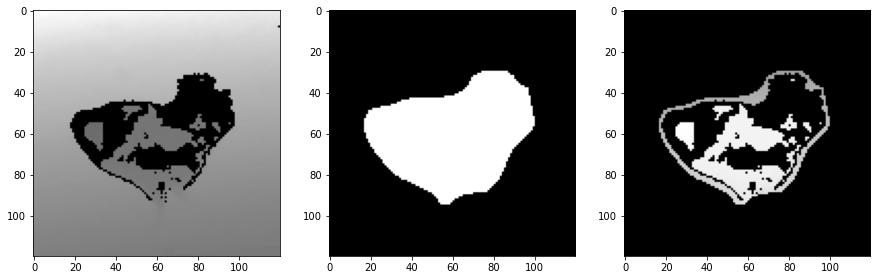

In [23]:
plot_images([image, mask, (image * mask)])

In [28]:
def extract_props_from_image(image, mask):
    
    label_image = label(mask)
    
    feature_names = ['label',
                     'centroid', 
                     'orientation',
                     'convex_area', 
                     'area',
                     'eccentricity', 
                     'extent',                   
                     'inertia_tensor',
                     'major_axis_length', 
                     'minor_axis_length']
    
    return pd.DataFrame(regionprops_table(label_image, 
                                          image, 
                                          feature_names))

In [29]:
extract_props_from_image(image, mask)

,label,centroid-0,centroid-1,orientation,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length
0,1,60.94539,60.140341,-1.285962,3695,3406,0.745956,0.631325,415.307962,65.185818,65.185818,211.761551,83.368491,55.523031
